### Install Required Libraries

In [ ]:
#!pip install numpy

In [ ]:
#!pip install pandas opencv-python keras tensorflow

In [ ]:
#!pip install pandas opencv-python keras tensorflow

### Task 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2

### Task 2: Import Dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
# x_test

Let's test any data sample to check if it is corect data or not

label= 5


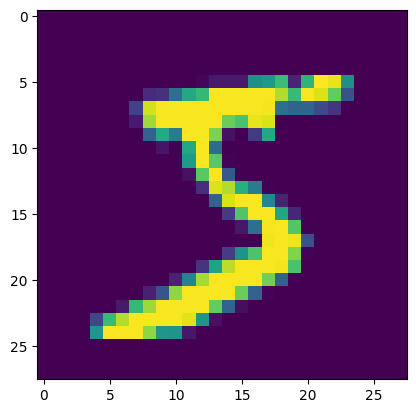

In [9]:
print("label=",y_train[0])
plt.imshow(x_train[0])

### Task 2: Data Preprocessing

In [10]:
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())

255 0 255 0


In [12]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

- The training data ranges between 0-255, now we will rescale the feature values to be in the range [0, 1]

In [13]:
x_train_processed, x_test_processed = x_train / 255.0, x_test / 255.0

In [14]:
print(x_train_processed.max(), x_train_processed.min(), x_test_processed.max(), x_test_processed.min())

1.0 0.0 1.0 0.0


### Task 3: Build a Classifier using MLP (Multi Layer perceptron)

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
from keras.optimizers import Adam

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
784*128+128

100480

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Task 4: Compile the Model

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Task 5: Train and Test the model.

In [21]:
history = model.fit(x_train_processed, y_train, epochs=5)
history

Epoch 1/5
1875/1875 [==============================] - 37s 17ms/step - loss: 0.2948 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1415 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1067 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0888 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0744 - accuracy: 0.9770


# Evaluation

In [22]:
test_loss, test_acc = model.evaluate(x_test_processed, y_test)

313/313 [==============================] - 6s 15ms/step - loss: 0.0685 - accuracy: 0.9797


In [23]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.06852062046527863
Test Accuracy:  0.9797000288963318


- Access Loss and Accuracy details from the training history

In [24]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

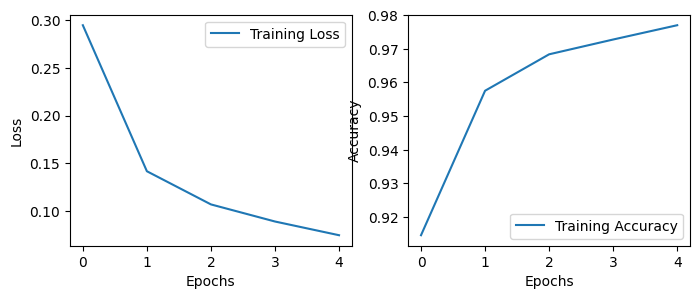

In [25]:
# Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- As we can see in the graph, loss has been decreased with each epoch where accuracy has been increased

### Let's make predictions on the test test and check whether those predictions are correct or not

In [27]:
# x_test_processed[1]

In [34]:
model.predict(x_test_processed)[2].argmax()

313/313 [==============================] - 4s 13ms/step


1

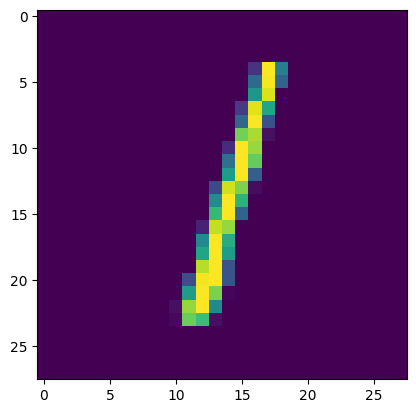

In [35]:
plt.imshow(x_test[2])

In [36]:
y_test[2]

1

In [29]:
y_test[0]

7

313/313 [==============================] - 2s 5ms/step


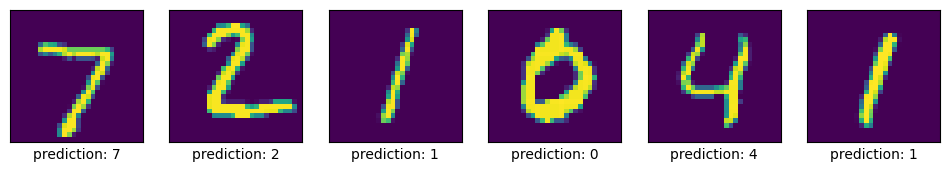

In [41]:
predictions = model.predict(x_test_processed)
plt.figure(figsize=(12, 5))
for i in range(6):
    plt.subplot(1, 6, i+1)
    prediction = predictions[i].argmax()
    image =plt.imshow(x_test_processed[i])
    plt.xlabel('prediction: '+str(prediction))
    plt.xticks([])  # Hide the x-axis scale and ticks
    plt.yticks([])  # Hide the y-axis scale and ticks
    